In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1296,ham,Sure! I am driving but will reach my destinati...,NaN,NaN,NaN
1287,ham,"What do you do, my dog ? Must I always wait ti...",NaN,NaN,NaN
802,spam,FREE for 1st week! No1 Nokia tone 4 ur mobile ...,NaN,NaN,NaN
2056,ham,.Please charge my mobile when you get up in mo...,NaN,NaN,NaN
4644,ham,Are you planning to come chennai?,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [14]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [15]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [17]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [18]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
from sklearn.preprocessing import OrdinalEncoder

In [20]:
od=OrdinalEncoder()
od.fit_transform(df[['v1','v2']])

array([[0.000e+00, 1.079e+03],
       [0.000e+00, 3.101e+03],
       [1.000e+00, 1.000e+03],
       ...,
       [0.000e+00, 3.286e+03],
       [0.000e+00, 3.901e+03],
       [0.000e+00, 3.409e+03]])

In [21]:
cat_col=df.select_dtypes(object).columns

In [22]:
cat_col

Index(['v1', 'v2'], dtype='object')

In [23]:
df[cat_col]=od.fit_transform(df[cat_col])

In [24]:
df

,v1,v2
0,0.0,1079.0
1,0.0,3101.0
2,1.0,1000.0
3,0.0,4088.0
4,0.0,2757.0
...,...,...
5567,1.0,3992.0
5568,0.0,4560.0
5569,0.0,3286.0
5570,0.0,3901.0


In [25]:
x=df[['v2']]
y=df['v1']

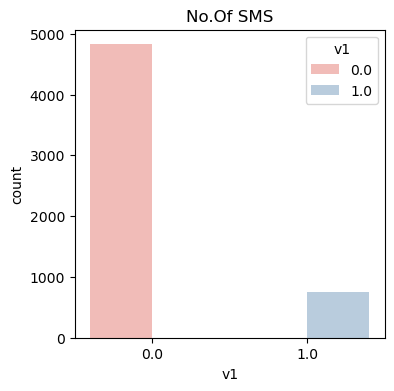

"The univariate graph, countplot indicates that the majority of SMS are in this dataset is Ham." 


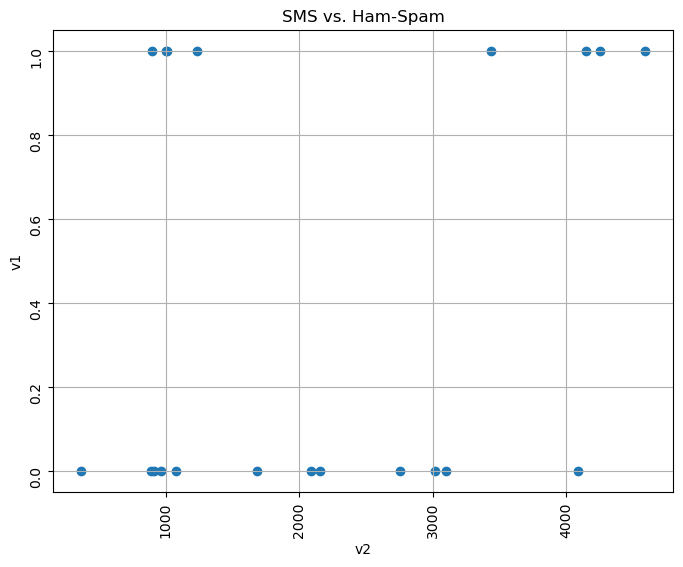

"The Bivariate graph, Scatter plot represents that the distribution of sms msg and spam or non spam observation. which is required for analyze to develop a accurate model."


In [26]:
plt.figure(figsize = (4,4))
sns.countplot(x="v1",data = df, hue ="v1", palette = "Pastel1")
plt.title("No.Of SMS")
plt.show()

print( '"The univariate graph, countplot indicates that the majority of SMS are in this dataset is Ham." ')

plt.figure(figsize=(8,6))
plt.scatter(x=df['v2'][0:20], y=df['v1'][0:20])
plt.title('SMS vs. Ham-Spam')
plt.xlabel('v2')
plt.ylabel('v1')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.grid()
plt.show()

print('"The Bivariate graph, Scatter plot represents that the distribution of sms msg and spam or non spam observation. which is required for analyze to develop a accurate model."')

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [29]:
from sklearn.metrics import classification_report, accuracy_score

In [30]:
#Evaluating model

cr=classification_report(ytest,ypred)
print(cr)
ac= accuracy_score(ytest,ypred)
print("Accuracy Score: ",ac)

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1454
         1.0       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672

Accuracy Score:  0.8696172248803827


In [31]:
logreg=LogisticRegression(solver='liblinear')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [32]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1454
         1.0       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672



In [33]:
logreg=LogisticRegression(solver='saga')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [34]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1454
         1.0       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672



In [35]:
logreg=LogisticRegression(solver='sag')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [36]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1454
         1.0       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672



In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt= DecisionTreeClassifier()

In [39]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))
    
    return model

In [40]:
mymodel(dt)

0.9132775119617225
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1454
         1.0       0.67      0.65      0.66       218

    accuracy                           0.91      1672
   macro avg       0.81      0.80      0.81      1672
weighted avg       0.91      0.91      0.91      1672



DecisionTreeClassifier()

In [41]:
from sklearn import tree

In [50]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
print(f"train score : {train} \n test score : {test}")

train score : 1.0 
 test score : 0.9132775119617225


In [51]:
for i in range(20,35):
    dt1 = DecisionTreeClassifier(max_depth = i)
    dt1.fit(xtrain,ytrain)
    ypred = dt1.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f"max_depth = {i} accuracy : {ac}")

max_depth = 20 accuracy : 0.9132775119617225
max_depth = 21 accuracy : 0.9132775119617225
max_depth = 22 accuracy : 0.9132775119617225
max_depth = 23 accuracy : 0.9132775119617225
max_depth = 24 accuracy : 0.9132775119617225
max_depth = 25 accuracy : 0.9132775119617225
max_depth = 26 accuracy : 0.9132775119617225
max_depth = 27 accuracy : 0.9132775119617225
max_depth = 28 accuracy : 0.9132775119617225
max_depth = 29 accuracy : 0.9132775119617225
max_depth = 30 accuracy : 0.9132775119617225
max_depth = 31 accuracy : 0.9132775119617225
max_depth = 32 accuracy : 0.9132775119617225
max_depth = 33 accuracy : 0.9132775119617225
max_depth = 34 accuracy : 0.9132775119617225


In [52]:
dt2 = DecisionTreeClassifier(max_depth = 24)
mymodel(dt2)

0.9132775119617225
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1454
         1.0       0.67      0.65      0.66       218

    accuracy                           0.91      1672
   macro avg       0.81      0.80      0.81      1672
weighted avg       0.91      0.91      0.91      1672



DecisionTreeClassifier(max_depth=24)

In [53]:
train = dt2.score(xtrain,ytrain)
test = dt2.score(xtest,ytest)
print(f"train score : {train} \n test score : {test}")

train score : 1.0 
 test score : 0.9132775119617225


In [54]:
for i in range(90,110):
    dt3 = DecisionTreeClassifier(min_samples_split = i)
    dt3.fit(xtrain,ytrain)
    ypred = dt3.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f"min_sample_split = {i} accuracy : {ac}")

min_sample_split = 90 accuracy : 0.8833732057416268
min_sample_split = 91 accuracy : 0.8833732057416268
min_sample_split = 92 accuracy : 0.8833732057416268
min_sample_split = 93 accuracy : 0.8833732057416268
min_sample_split = 94 accuracy : 0.8845693779904307
min_sample_split = 95 accuracy : 0.8845693779904307
min_sample_split = 96 accuracy : 0.8845693779904307
min_sample_split = 97 accuracy : 0.8845693779904307
min_sample_split = 98 accuracy : 0.8845693779904307
min_sample_split = 99 accuracy : 0.8803827751196173
min_sample_split = 100 accuracy : 0.8803827751196173
min_sample_split = 101 accuracy : 0.8744019138755981
min_sample_split = 102 accuracy : 0.8744019138755981
min_sample_split = 103 accuracy : 0.8744019138755981
min_sample_split = 104 accuracy : 0.8744019138755981
min_sample_split = 105 accuracy : 0.8744019138755981
min_sample_split = 106 accuracy : 0.8744019138755981
min_sample_split = 107 accuracy : 0.8744019138755981
min_sample_split = 108 accuracy : 0.8744019138755981
min

In [55]:
dt4 = DecisionTreeClassifier(min_samples_split = 92)
mymodel(dt4)

0.8833732057416268
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94      1454
         1.0       0.66      0.22      0.33       218

    accuracy                           0.88      1672
   macro avg       0.78      0.60      0.63      1672
weighted avg       0.86      0.88      0.86      1672



DecisionTreeClassifier(min_samples_split=92)

In [56]:
train = dt4.score(xtrain,ytrain)
test = dt4.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.892051282051282 
 test score : 0.8833732057416268


In [57]:
for i in range(30,50):
    dt5 = DecisionTreeClassifier(min_samples_split = i)
    dt5.fit(xtrain,ytrain)
    ypred = dt5.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f"min_sample_split = {i} accuracy : {ac}")

min_sample_split = 30 accuracy : 0.9007177033492823
min_sample_split = 31 accuracy : 0.9013157894736842
min_sample_split = 32 accuracy : 0.902511961722488
min_sample_split = 33 accuracy : 0.9001196172248804
min_sample_split = 34 accuracy : 0.8947368421052632
min_sample_split = 35 accuracy : 0.8947368421052632
min_sample_split = 36 accuracy : 0.8977272727272727
min_sample_split = 37 accuracy : 0.8977272727272727
min_sample_split = 38 accuracy : 0.8977272727272727
min_sample_split = 39 accuracy : 0.8977272727272727
min_sample_split = 40 accuracy : 0.9001196172248804
min_sample_split = 41 accuracy : 0.9001196172248804
min_sample_split = 42 accuracy : 0.8995215311004785
min_sample_split = 43 accuracy : 0.8971291866028708
min_sample_split = 44 accuracy : 0.8983253588516746
min_sample_split = 45 accuracy : 0.8989234449760766
min_sample_split = 46 accuracy : 0.8989234449760766
min_sample_split = 47 accuracy : 0.8989234449760766
min_sample_split = 48 accuracy : 0.9001196172248804
min_sample_sp

In [59]:
dt6 = DecisionTreeClassifier(min_samples_split = 44)
mymodel(dt6)

0.8983253588516746
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      1454
         1.0       0.71      0.38      0.49       218

    accuracy                           0.90      1672
   macro avg       0.81      0.68      0.72      1672
weighted avg       0.89      0.90      0.88      1672



DecisionTreeClassifier(min_samples_split=44)

In [61]:
train = dt6.score(xtrain,ytrain)
test = dt6.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.92 
 test score : 0.8983253588516746


In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) # by default n_neighbors = 5
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [63]:
#evaluate the model

from sklearn.metrics import accuracy_score
ac = accuracy_score(ytest,ypred)
print(ac)

0.9078947368421053


In [65]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(xtrain,ytrain)
ypred = rc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1454
         1.0       0.67      0.65      0.66       218

    accuracy                           0.91      1672
   macro avg       0.81      0.80      0.81      1672
weighted avg       0.91      0.91      0.91      1672



In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred = ada.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1454
         1.0       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.76      0.87      0.81      1672



In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred = gbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      1454
         1.0       0.82      0.23      0.36       218

    accuracy                           0.89      1672
   macro avg       0.86      0.61      0.65      1672
weighted avg       0.89      0.89      0.87      1672



In [93]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [95]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1454
         1.0       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672



In [96]:
bg = BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1454
         1.0       0.67      0.61      0.64       218

    accuracy                           0.91      1672
   macro avg       0.81      0.78      0.80      1672
weighted avg       0.91      0.91      0.91      1672



In [97]:
models =[]
models.append(("lr",LogisticRegression()))
models.append(("dt",DecisionTreeClassifier()))

In [98]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models)  # estimators ---> model name
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1454
         1.0       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672



In [99]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models,voting='soft')  # estimators ---> model name
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1454
         1.0       0.67      0.65      0.66       218

    accuracy                           0.91      1672
   macro avg       0.81      0.80      0.81      1672
weighted avg       0.91      0.91      0.91      1672



In [100]:
from sklearn.naive_bayes import GaussianNB

In [101]:
nb_classifier = GaussianNB()
nb_classifier.fit(xtrain,ytrain)
ypred = nb_classifier.predict(xtest)

In [102]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(ytest, ypred)
conf_matrix = confusion_matrix(ytest, ypred)
classification_rep = classification_report(ytest, ypred)

In [103]:
print("Accuracy", accuracy)
print("\nConfusion Matrix: \n", conf_matrix)
print("\nClassification Report: \n",classification_rep)

Accuracy 0.8696172248803827

Confusion Matrix: 
 [[1454    0]
 [ 218    0]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1454
         1.0       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672

